## 데이터 시각화 목표

  - 장르별 유료/무료
  - 장르별 연령대 분포
  - 평점 9.7이상 장르 분포
  - 장르별 평점 TOP 5

<br/>

[네이버 웹툰 데이터](https://www.kaggle.com/datasets/bmofinnjake/naverwebtoon-datakorean)

In [ ]:
# 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#드라이브 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# free : True = 유료, False = 무료
# completed : True : 완결, False = 연재중

webtoon = pd.read_csv('/content/drive/MyDrive/naver.csv')
webtoon.head()

,id,title,author,genre,description,rating,date,completed,age,free,link
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...


In [ ]:
# 분석에 필요없는 데이터열 제거

webtoon.drop(['id', 'link', 'date', 'description'], axis = 1, inplace=True) # axis = 0은 행 , axis = 1은 열
webtoon.head()

,title,author,genre,rating,completed,age,free
0,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",9.13,True,전체연령가,True
1,가담항설,랑또,"스토리, 판타지",9.98,True,12세 이용가,True
2,가령의 정체불명 이야기,가령,"옴니버스, 드라마",9.95,True,15세 이용가,True
3,가비지타임,2사장,"스토리, 스포츠",9.96,False,전체연령가,False
4,가상&RPG,주다현,"스토리, 판타지",9.91,False,12세 이용가,False


In [ ]:
# 데이터셋 정보 불러옴

webtoon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      2100 non-null   object 
 1   author     2100 non-null   object 
 2   genre      2100 non-null   object 
 3   rating     2100 non-null   float64
 4   completed  2100 non-null   bool   
 5   age        1998 non-null   object 
 6   free       2100 non-null   bool   
dtypes: bool(2), float64(1), object(4)
memory usage: 86.3+ KB


In [ ]:
# 결측치 제거를 위해 age열에 비어 있는 부분 출력

webtoon.loc[webtoon['age'].isnull()] # loc : 특정 데이터 슬라이스

,title,author,genre,rating,completed,age,free
44,갤러리L : 당신의 기억을...,조홍 / 라미아,"스토리, 로맨스",9.27,True,NaN,True
117,구덩이,철이,"스토리, 액션",9.70,True,NaN,True
125,구원자 요즘 뭐해요,판톰,"스토리, 판타지",9.68,True,NaN,True
133,국왕과 성기사의 약탈혼,이린비 / 박지은,"스토리, 로맨스",9.90,True,NaN,True
163,그녀는 가면을 쓴다,월해 / 템푸,"스토리, 판타지",9.64,True,NaN,True
...,...,...,...,...,...,...,...
2019,W : 너와 나의 세계,주니버스 / 이채,"스토리, 로맨스",9.77,True,NaN,True
2020,XXX,투먼,"스토리, 스릴러",8.36,True,NaN,True
2023,100억의 주인,맛기니 / 텅빈,"스토리, 드라마",8.50,True,NaN,True
2026,10년째 차이는 소꿉친구,님니,"스토리, 로맨스",9.86,True,NaN,True


In [ ]:
# 웹툰의 연령대를 평균내서 채울 수 없기에 연령이 NULL인 행 전부 제거

webtoon.dropna(axis = 0, inplace=True)

In [ ]:
# 결측치가 제대로 처리 되었는지 확인하기 위함

webtoon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1998 non-null   object 
 1   author     1998 non-null   object 
 2   genre      1998 non-null   object 
 3   rating     1998 non-null   float64
 4   completed  1998 non-null   bool   
 5   age        1998 non-null   object 
 6   free       1998 non-null   bool   
dtypes: bool(2), float64(1), object(4)
memory usage: 97.6+ KB


In [ ]:
# ,가 있는 행의 개수 출력(장르 2개이상이 몇개인지 출력하기 위함)

webtoon[webtoon['genre'].str.count(',') >= 1].shape[0]

1998

In [ ]:
# 장르의 종류 개수 출력
genre_list = []

for genre_data in webtoon['genre']:
    genre_list.extend(genre_data.split(','))

genre_counts = Counter(genre_list)

print("장르의 종류와 개수:")
for genre, count in genre_counts.items():
    print(genre + " : " + str(count))

장르의 종류와 개수:
스토리 : 1681
 로맨스 : 514
 판타지 : 346
옴니버스 : 113
 드라마 : 413
 스포츠 : 23
 개그 : 135
에피소드 : 204
 일상 : 78
 스릴러 : 246
 액션 : 169
 감성 : 32
 무협/사극 : 42


In [ ]:
# 애매한 장르 데이터 전처리 / 데이터의 편향 처리를 위함

webtoon['genre'] = webtoon['genre'].str.replace('스토리, ', '')
webtoon['genre'] = webtoon['genre'].str.replace('에피소드, ', '')
webtoon['genre'] = webtoon['genre'].str.replace('옴니버스, ', '')

In [ ]:
# ,가 있는 행의 개수 출력(장르 2개이상이 몇개인지 출력하기 위함)

webtoon[webtoon['genre'].str.count(',') >= 1].shape[0]

0

In [ ]:
# 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic')

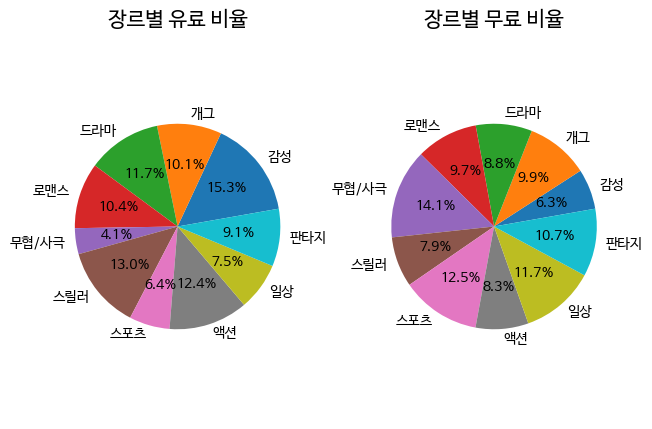

In [ ]:
# 각 장르의 개수 / 전체 개수를 이용하여 비율을 구함

webtoon_percentageT = webtoon[webtoon['free'] == True].groupby('genre').size() / webtoon.groupby('genre').size()
webtoon_percentageF = webtoon[webtoon['free'] == False].groupby('genre').size() / webtoon.groupby('genre').size()


fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

webtoon_percentageT.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax1)
ax1.set_title('장르별 유료 비율', size = 15)
ax1.axis('equal')

webtoon_percentageF.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax2)
ax2.set_title('장르별 무료 비율', size = 15)
ax2.axis('equal')

plt.subplots_adjust(wspace=0.4) # 그래프 간 공간 제공
plt.show()

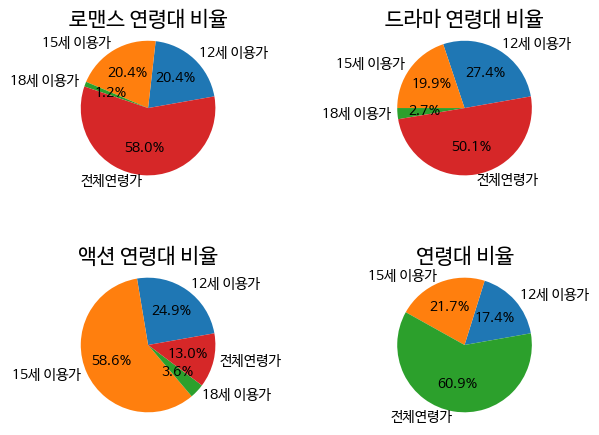

In [ ]:
# 장르별 연령대 분포

romance_webtoon = webtoon[webtoon['genre'] == '로맨스']
drama_webtoon = webtoon[webtoon['genre'] == '드라마']
action_webtoon = webtoon[webtoon['genre'] == '액션']
sport_webtoon = webtoon[webtoon['genre'] == '스포츠']

romance_percentage = romance_webtoon.groupby('age').size() / webtoon[webtoon['genre'] == '로맨스'].size
drama_percentage = drama_webtoon.groupby('age').size() / webtoon[webtoon['genre'] == '드라마'].size
action_percentage = action_webtoon.groupby('age').size() / webtoon[webtoon['genre'] == '액션'].size
sport_percentage = sport_webtoon.groupby('age').size() / webtoon[webtoon['genre'] == '스포츠'].size

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

romance_percentage.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax1)
ax1.set_title('로맨스 연령대 비율', size = 15)
ax1.axis('equal')

drama_percentage.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax2)
ax2.set_title('드라마 연령대 비율', size = 15)
ax2.axis('equal')

action_percentage.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax3)
ax3.set_title('액션 연령대 비율', size = 15)
ax3.axis('equal')

sport_percentage.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax4)
ax4.set_title('연령대 비율', size = 15)
ax4.axis('equal')

plt.subplots_adjust(wspace=0.4,hspace=0.6) # 그래프 간 공간 제공
plt.show()

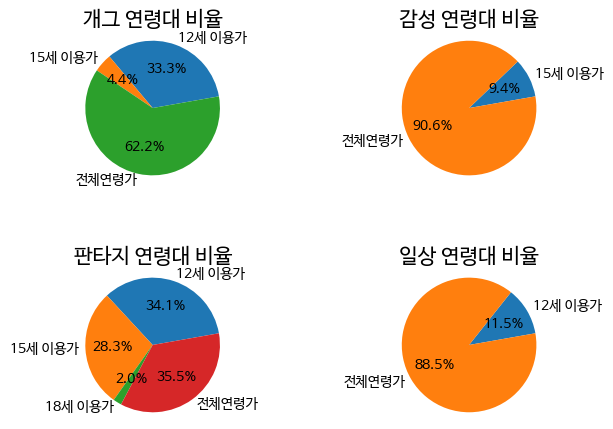

In [ ]:
# 장르별 연령대 분포

gag_webtoon = webtoon[webtoon['genre'] == '개그']
emotional_webtoon = webtoon[webtoon['genre'] == '감성']
fantasy_webtoon = webtoon[webtoon['genre'] == '판타지']
daily_webtoon = webtoon[webtoon['genre'] == '일상']


gag_percentage = gag_webtoon.groupby('age').size() / webtoon[webtoon['genre'] == '개그'].size
emotional_percentage = emotional_webtoon.groupby('age').size() / webtoon[webtoon['genre'] == '감성'].size
fantasy_percentage = fantasy_webtoon.groupby('age').size() / webtoon[webtoon['genre'] == '판타지'].size
daily_percentage = daily_webtoon.groupby('age').size() / webtoon[webtoon['genre'] == '일상'].size

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

gag_percentage.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax1)
ax1.set_title('개그 연령대 비율', size = 15)
ax1.axis('equal')

emotional_percentage.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax2)
ax2.set_title('감성 연령대 비율', size = 15)
ax2.axis('equal')

fantasy_percentage.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax3)
ax3.set_title('판타지 연령대 비율', size = 15)
ax3.axis('equal')

daily_percentage.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax4)
ax4.set_title('일상 연령대 비율', size = 15)
ax4.axis('equal')

plt.subplots_adjust(wspace=0.4,hspace=0.6) # 그래프 간 공간 제공
plt.show()


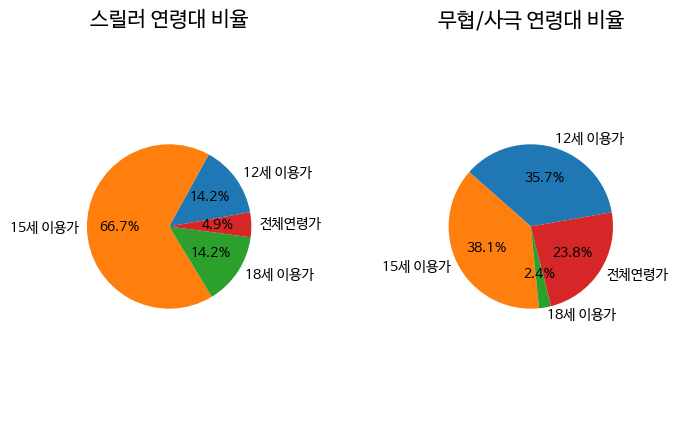

In [ ]:
# 장르별 연령대 분포

horror_webtoon = webtoon[webtoon['genre'] == '스릴러']
historical_webtoon = webtoon[webtoon['genre'] == '무협/사극']


horror_percentage = horror_webtoon.groupby('age').size() / webtoon[webtoon['genre'] == '스릴러'].size
historical_percentage = historical_webtoon.groupby('age').size() / webtoon[webtoon['genre'] == '무협/사극'].size

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

horror_percentage.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax1)
ax1.set_title('스릴러 연령대 비율', size = 15)
ax1.axis('equal')

historical_percentage.plot(kind = 'pie', figsize= (7, 5), autopct='%1.1f%%', startangle=10, ax = ax2)
ax2.set_title('무협/사극 연령대 비율', size = 15)
ax2.axis('equal')

plt.subplots_adjust(wspace=1) # 그래프 간 공간 제공
plt.show()


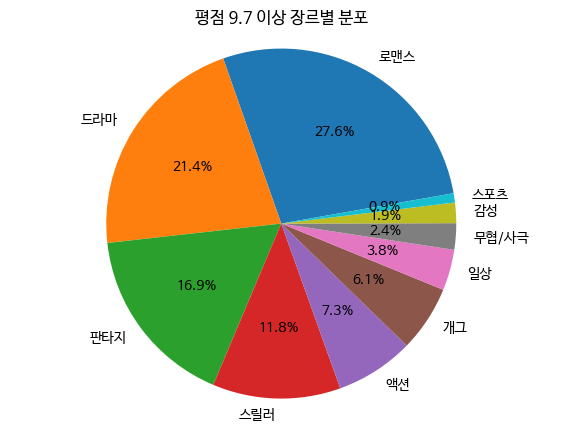

In [ ]:
# 평점 9.7이상 장르 분포

score_webtoon = webtoon[webtoon['rating'] >= 9.7]

# 장르별 개수 카운트
genre_counts = score_webtoon['genre'].value_counts()

plt.figure(figsize=(7, 5))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=10)
plt.title('평점 9.7 이상 장르별 분포')
plt.axis('equal')  # 원을 원형으로 유지
plt.show()

In [ ]:
# 드라마 장르별 평점 TOP 5

drama_webtoon_list = webtoon[webtoon['genre'] == '드라마']

drama_webtoon = drama_webtoon_list.sort_values(by='rating', ascending=False)

drama_webtoon.head(5)

,title,author,genre,rating,completed,age,free
865,샌프란시스코 화랑관,돌배,드라마,9.98,True,전체연령가,True
120,구름의 이동속도,김이랑,드라마,9.98,True,전체연령가,True
144,귀곡의 문,삼촌,드라마,9.98,True,12세 이용가,True
1309,왕세자 입학도,무번,드라마,9.98,False,전체연령가,False
152,"그 개, 만두",호정,드라마,9.98,True,전체연령가,True


In [ ]:
# 로맨스 장르별 평점 TOP 5

romance_webtoon_list = webtoon[webtoon['genre'] == '로맨스']

romance_webtoon = romance_webtoon_list.sort_values(by='rating', ascending=False)

romance_webtoon.head(5)

,title,author,genre,rating,completed,age,free
952,순정빌런,세윤,로맨스,9.99,False,12세 이용가,False
1044,썸머 브리즈,한경찰,로맨스,9.98,True,전체연령가,True
1417,이번 생도 잘 부탁해,이혜,로맨스,9.98,True,전체연령가,False
1254,오늘도 사랑스럽개,이혜,로맨스,9.98,True,12세 이용가,True
324,녹두전,혜진양,로맨스,9.98,True,전체연령가,True


In [ ]:
# 스포츠 장르별 평점 TOP 5

sport_webtoon_list = webtoon[webtoon['genre'] == '스포츠']

sport_webtoon = sport_webtoon_list.sort_values(by='rating', ascending=False)

sport_webtoon.head(5)

,title,author,genre,rating,completed,age,free
1757,파도를 찾아라!,김정현,스포츠,9.97,True,전체연령가,True
3,가비지타임,2사장,스포츠,9.96,False,전체연령가,False
1368,위닝샷!,강견 / 시바견,스포츠,9.95,False,12세 이용가,False
383,더 복서,정지훈,스포츠,9.91,True,15세 이용가,True
176,그린보이,정재한 / 임진국,스포츠,9.90,True,15세 이용가,False


In [ ]:
# 감성 장르별 평점 TOP 5

emotional_webtoon_list = webtoon[webtoon['genre'] == '감성']

emotional_webtoon = emotional_webtoon_list.sort_values(by='rating', ascending=False)

emotional_webtoon.head(5)

,title,author,genre,rating,completed,age,free
1108,안녕 나의 모모로,켄타,감성,9.98,True,전체연령가,True
1939,홍차리브레,꼬모소이,감성,9.98,True,전체연령가,True
588,모퉁이 뜨개방,소영,감성,9.98,True,전체연령가,True
1219,연우의 순정,이솔,감성,9.98,False,15세 이용가,False
1813,플랫다이어리,임현,감성,9.98,True,전체연령가,True


In [ ]:
# 무협/사극 장르별 평점 TOP 5

historical_webtoon_list = webtoon[webtoon['genre'] == '무협/사극']

historical_webtoon = historical_webtoon_list.sort_values(by='rating', ascending=False)

historical_webtoon.head(5)

,title,author,genre,rating,completed,age,free
1321,용비불패 완전판,류기운 / 문정후,무협/사극,9.98,True,15세 이용가,True
107,광마회귀,JP / 이히 / 유진성,무협/사극,9.97,True,15세 이용가,False
1079,"아이소포스 1, 2부",김양수 / 도가도,무협/사극,9.96,True,12세 이용가,False
824,사신,임재원 / 설봉,무협/사극,9.96,False,15세 이용가,False
610,문아,팬마,무협/사극,9.95,True,전체연령가,False


In [ ]:
# 일상 장르별 평점 TOP 5

dailiy_webtoon_list = webtoon[webtoon['genre'] == '일상']

dailiy_webtoon = dailiy_webtoon_list.sort_values(by='rating', ascending=False)

dailiy_webtoon.head(5)

,title,author,genre,rating,completed,age,free
229,나는 귀머거리다,라일라,일상,9.98,True,전체연령가,False
1366,웰캄투실버라이프,솔녀,일상,9.98,True,전체연령가,True
316,노곤하개,홍끼,일상,9.98,True,전체연령가,True
1339,우바우,잇선,일상,9.97,True,12세 이용가,False
379,대학원 탈출일지,요다,일상,9.97,False,전체연령가,False


In [ ]:
# 개그 장르별 평점 TOP 5

gag_webtoon_list = webtoon[webtoon['genre'] == '개그']

gag_webtoon = gag_webtoon_list.sort_values(by='rating', ascending=False)

gag_webtoon.head(5)

,title,author,genre,rating,completed,age,free
2094,[드라마원작] 쌉니다 천리...,김규삼,개그,9.98,True,전체연령가,True
357,달수 이야기,산삼,개그,9.98,True,전체연령가,True
1264,오늘의 순정망화,손하기,개그,9.98,True,전체연령가,True
887,선천적 얼간이들,가스파드,개그,9.98,True,전체연령가,True
939,수능일기,자까,개그,9.98,True,전체연령가,True


In [ ]:
# 액션 장르별 평점 TOP 5

action_webtoon_list = webtoon[webtoon['genre'] == '액션']

action_webtoon = action_webtoon_list.sort_values(by='rating', ascending=False)

action_webtoon.head(5)

,title,author,genre,rating,completed,age,free
51,검은인간,이저녁,액션,9.98,True,15세 이용가,True
2005,MZ-레이징 인페르노,최훈 / 청설모,액션,9.98,True,15세 이용가,False
786,비질란테,CRG / 김규삼,액션,9.98,True,15세 이용가,True
108,광장,오세형 / 김균태,액션,9.97,True,15세 이용가,True
1014,신석기녀,재아 / 한가람,액션,9.97,True,12세 이용가,True


In [ ]:
# 스릴러 장르별 평점 TOP 5

horror_webtoon_list = webtoon[webtoon['genre'] == '스릴러']

horror_webtoon = horror_webtoon_list.sort_values(by='rating', ascending=False)

horror_webtoon.head(5)

,title,author,genre,rating,completed,age,free
559,먹이,외눈박이 / 박수봉,스릴러,9.98,True,15세 이용가,True
1440,인간의 숲,황준호,스릴러,9.98,True,18세 이용가,True
453,똑 닮은 딸,이담,스릴러,9.98,False,15세 이용가,False
150,귀전구담,QTT,스릴러,9.98,True,12세 이용가,True
1968,후레자식,김칸비 / 황영찬,스릴러,9.98,True,18세 이용가,True


In [ ]:
# 판타지 장르별 평점 TOP 5

fantasy_webtoon_list = webtoon[webtoon['genre'] == '판타지']

fantasy_webtoon = fantasy_webtoon_list.sort_values(by='rating', ascending=False)

fantasy_webtoon.head(5)

,title,author,genre,rating,completed,age,free
1,가담항설,랑또,판타지,9.98,True,12세 이용가,True
1920,호랑신랑뎐,고추참치,판타지,9.98,False,전체연령가,False
1139,어글리후드,미애,판타지,9.98,False,12세 이용가,False
479,레코닝,이혜,판타지,9.98,True,12세 이용가,True
227,나노리스트,민송아,판타지,9.98,True,12세 이용가,True
